In [83]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pickle

In [2]:
# read dataset
df=pd.read_csv('spam_ham_dataset.csv')

In [3]:
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(df.text,df.label_num,test_size=0.20)

In [6]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.text)

In [9]:
X.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
mnb_clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

mnb_clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [34]:
lr_clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('lr',LogisticRegression(max_iter=200))
])

lr_clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=200))])

In [35]:
dt_clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('dt',DecisionTreeClassifier())
])

dt_clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('dt', DecisionTreeClassifier())])

In [36]:
svm_clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('dt',SVC(gamma='auto'))
])

svm_clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('dt', SVC(gamma='auto'))])

In [22]:
mnb_clf.score(X_test,y_test)

0.9768115942028985

In [34]:
lr_clf.score(X_test,y_test)

0.9748792270531401

In [82]:
dt_clf.score(X_test,y_test)

0.9555555555555556

In [13]:
svm_clf.score(X_test,y_test)

0.7294685990338164

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

accuracy score: 0.9768115942028985
percision score: [0.98095238 0.96666667]
recall score: [0.98632011 0.95394737]
f1 score: [0.98362892 0.9602649 ]

classification report via sklearn

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       731
           1       0.97      0.95      0.96       304

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



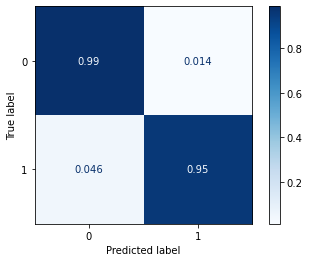

In [76]:
y_pred = mnb_clf.predict(X_test)
print("accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("percision score: " + str(precision_score(y_test, y_pred, average=None)))
print("recall score: " + str(recall_score(y_test, y_pred, average=None)))
print("f1 score: " + str(f1_score(y_test, y_pred, average=None)))

print("\nclassification report via sklearn\n")
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)
plot_confusion_matrix(mnb_clf, X_test, y_test, cmap=plt.cm.Blues, normalize="true")
plt.show()

accuracy score: 0.9845410628019323
percision score: [0.99039781 0.97058824]
recall score: [0.9876881  0.97697368]
f1 score: [0.9890411  0.97377049]

classification report via sklearn

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       731
           1       0.97      0.98      0.97       304

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



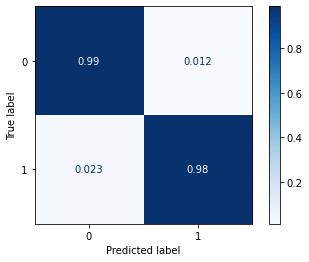

In [77]:
y_pred = lr_clf.predict(X_test)
print("accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("percision score: " + str(precision_score(y_test, y_pred, average=None)))
print("recall score: " + str(recall_score(y_test, y_pred, average=None)))
print("f1 score: " + str(f1_score(y_test, y_pred, average=None)))

print("\nclassification report via sklearn\n")
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)
plot_confusion_matrix(lr_clf, X_test, y_test, cmap=plt.cm.Blues, normalize="true")
plt.show()

accuracy score: 0.9555555555555556
percision score: [0.97902098 0.903125  ]
recall score: [0.95759234 0.95065789]
f1 score: [0.96818811 0.92628205]

classification report via sklearn

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       731
           1       0.90      0.95      0.93       304

    accuracy                           0.96      1035
   macro avg       0.94      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



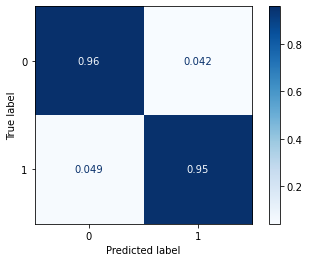

In [78]:
y_pred = dt_clf.predict(X_test)
print("accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("percision score: " + str(precision_score(y_test, y_pred, average=None)))
print("recall score: " + str(recall_score(y_test, y_pred, average=None)))
print("f1 score: " + str(f1_score(y_test, y_pred, average=None)))

print("\nclassification report via sklearn\n")
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)
plot_confusion_matrix(dt_clf, X_test, y_test, cmap=plt.cm.Blues, normalize="true")
plt.show()

accuracy score: 0.7294685990338164
percision score: [0.72304649 1.        ]
recall score: [1.         0.07894737]
f1 score: [0.83926521 0.14634146]

classification report via sklearn

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       731
           1       1.00      0.08      0.15       304

    accuracy                           0.73      1035
   macro avg       0.86      0.54      0.49      1035
weighted avg       0.80      0.73      0.64      1035



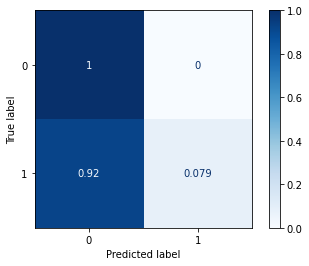

In [79]:
y_pred = svm_clf.predict(X_test)
print("accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("percision score: " + str(precision_score(y_test, y_pred, average=None)))
print("recall score: " + str(recall_score(y_test, y_pred, average=None)))
print("f1 score: " + str(f1_score(y_test, y_pred, average=None)))

print("\nclassification report via sklearn\n")
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)
plot_confusion_matrix(svm_clf, X_test, y_test, cmap=plt.cm.Blues, normalize="true")
plt.show()

In [86]:
filename = 'lr_spam_detection_model.sav'
pickle.dump(lr_clf, open(filename, 'wb'))

In [36]:
lowercase ='abcdefghijklmnopqrstuvwxyz'
uppercase ='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
symbols='#!/\$%?&*()_+-^[]{|}><~;:.,»«@£="'+"'"
numbers='0123456789'

def lower_score(text):
    return sum([char_ in lowercase for char_ in text])/len(text)

def upper_score(text):
    return sum([char_ in uppercase for char_ in text])/len(text)

def symbol_score(text):
    return sum([char_ in symbols for char_ in text])/len(text)

def number_score(text):
    return sum([char_ in numbers for char_ in text])/len(text)

def space_score(text):
    return sum([char_ in ' ' for char_ in text])/len(text)

def length(text):
    return len(text)

In [37]:
df_fe = pd.DataFrame()  
df_fe['lower_score'] = df['text'].apply(lower_score)
df_fe['upper_score'] = df['text'].apply(upper_score)
df_fe['number_score'] = df['text'].apply(number_score)
df_fe['symbol_score'] = df['text'].apply(symbol_score)
df_fe['space_score'] = df['text'].apply(space_score)

In [39]:
X_train,X_test,y_train,y_test=train_test_split(df_fe,df.label_num,test_size=0.20)

In [40]:
fe_nb_clf = MultinomialNB()
fe_lr_clf = LogisticRegression(max_iter=200)
fe_dt_clf = DecisionTreeClassifier()

fe_nb_clf.fit(X_train,y_train)
fe_lr_clf.fit(X_train,y_train)
fe_dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
fe_nb_clf.score(X_test,y_test)

0.6908212560386473

In [42]:
fe_lr_clf.score(X_test,y_test)

0.7256038647342995

In [43]:
fe_dt_clf.score(X_test,y_test)

0.8038647342995169

In [50]:
df_std_fe = pd.DataFrame()  

std_ls = np.std(df_fe['lower_score'])
mean_ls = np.mean(df_fe['lower_score'])
df_std_fe['lower_score_std'] = (df_fe['lower_score']-mean_ls)/std_ls

std_us = np.std(df_fe['upper_score'])
mean_us = np.mean(df_fe['upper_score'])
df_std_fe['upper_score_std'] = (df_fe['upper_score']-mean_us)/std_us

std_ns = np.std(df_fe['number_score'])
mean_ns = np.mean(df_fe['number_score'])
df_std_fe['number_score_std'] = (df_fe['number_score']-mean_ns)/std_ns

std_ss = np.std(df_fe['symbol_score'])
mean_ss = np.mean(df_fe['symbol_score'])
df_std_fe['symbol_score_std'] = (df_fe['symbol_score']-mean_ss)/std_ss

std_sps = np.std(df_fe['space_score'])
mean_sps = np.mean(df_fe['space_score'])
df_std_fe['space_score_std'] = (df_fe['space_score']-mean_sps)/std_sps

In [51]:
X_train,X_test,y_train,y_test=train_test_split(df_std_fe,df.label_num,test_size=0.20)

In [53]:
std_fe_nb_clf = GaussianNB()
std_fe_lr_clf = LogisticRegression(max_iter=200)
std_fe_dt_clf = DecisionTreeClassifier()

std_fe_nb_clf.fit(X_train,y_train)
std_fe_lr_clf.fit(X_train,y_train)
std_fe_dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
fe_nb_clf.score(X_test,y_test)

0.7420289855072464

In [55]:
fe_lr_clf.score(X_test,y_test)

0.7072463768115942

In [56]:
fe_dt_clf.score(X_test,y_test)

0.43671497584541064